In [1]:
from dotenv import load_dotenv
load_dotenv()
import os
os.chdir(os.environ.get("WORK_DIR"))

In [2]:
from biochatter.llm_connect import GptConversation
from biochatter.api_agent import APIAgent, ScanpyQueryBuilder, ScanpyFetcher, ScanpyInterpreter

import yaml
import os
import scanpy
from scanpy.datasets import pbmc3k

scanpy.settings.datasetdir = os.environ.get("DATA", "data")

system_prompt = """
You are a professional bioinformatician. You have access to the data object named `data`.
Please only use the provided tools. Do not use any tools that are not provided.
"""
query_builder_conv = GptConversation(model_name="gpt-3.5-turbo", prompts={
    "primary_model_prompts": system_prompt
})
interpreter_conv = GptConversation(model_name="gpt-3.5-turbo", prompts={
    "primary_model_prompts": system_prompt
})

scanpy_agent = APIAgent(
    query_builder=ScanpyQueryBuilder(
        conversation=query_builder_conv,
    ),
    fetcher=ScanpyFetcher(),
    interpreter=ScanpyInterpreter( # Jiahang: explain codes, args, etc. see biomania.
        conversation=interpreter_conv,
    )
)

with open('experiment/scanpy/cases.yaml', 'r') as f:
    cases = yaml.safe_load(f)


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
len(cases)

11

===== QUESTION 0: Plot umap embedding of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


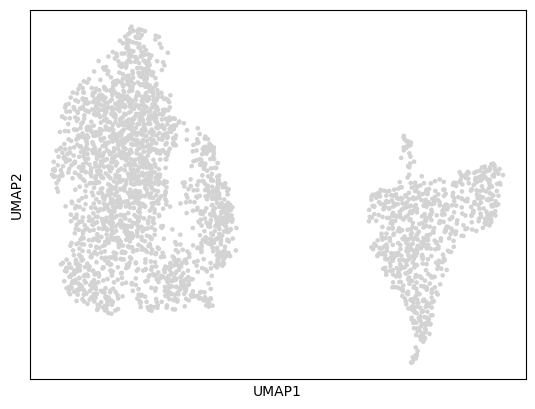

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=50, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.pl.umap(adata=data, color=None, mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False, edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None, components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map=None, cmap=None, palette=None, na_color='lightgray', na_in_legend=True, size=None, frameon=None, legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None, colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False, outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, show=True, save=None, ax=None, return_fig=None, marker='.')

===== QUESTION 1: Plot umap embedding of cells, which are colored by leiden clustering. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/jiahang/Documents/biochatter/biochatter/api_agent/base/_python_interpreter.py:743: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's i

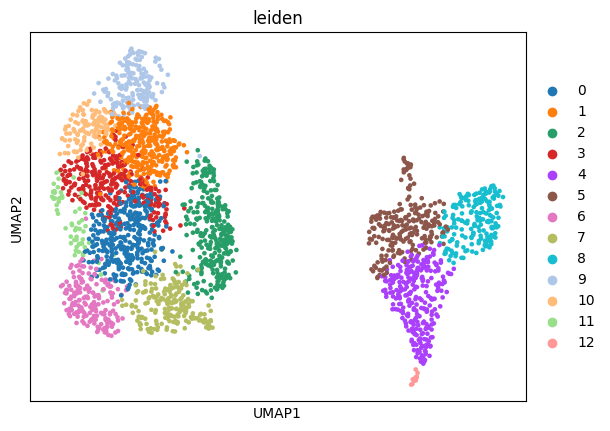

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.leiden(adata=data, resolution=1.0, random_state=0, use_weights=True)
sc.pl.umap(adata=data, color='leiden', mask_obs=None, gene_symbols=None, use_raw=None, sort_order=True, edges=False, edges_width=0.1, edges_color='grey', neighbors_key=None, arrows=False, arrows_kwds=None, groups=None, components=None, dimensions=None, layer=None, projection='2d', scale_factor=None, color_map=None, cmap=None, palette=None, na_color='lightgray', na_in_legend=True, size=None, frameon=None, legend_fontsize=None, legend_fontweight='bold', legend_loc='right margin', legend_fontoutline=None, colorbar_loc='right', vmax=None, vmin=None, vcenter=None, norm=None, add_outline=False, outline_width=(0.3, 0.05), outline_color=('black', 'white'), ncols=4, hspace=0.25, wspace=None, show=None, save=None, ax=None, return_fig=None, marker='.')

===== QUESTION 2: Plot heatmap of 

/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


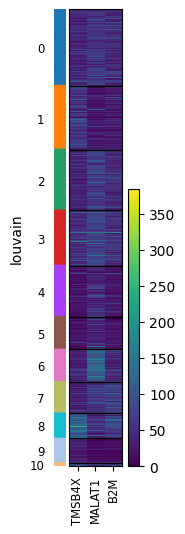

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.heatmap(adata=data, var_names=['TMSB4X', 'MALAT1', 'B2M'], groupby='louvain')

===== QUESTION 3: Plot dotplot with dendrogram of gene expressions of genes ['TMSB4X', 'MALAT1', 'B2M'], where cells are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


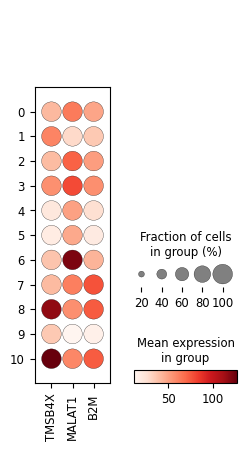

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.dotplot(adata=data, var_names=['TMSB4X', 'MALAT1', 'B2M'], groupby='louvain')

===== QUESTION 4: Plot violinplot of gene expressions of genes ['TMSB4X', 'MALAT1', 'B2M'], where cells are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


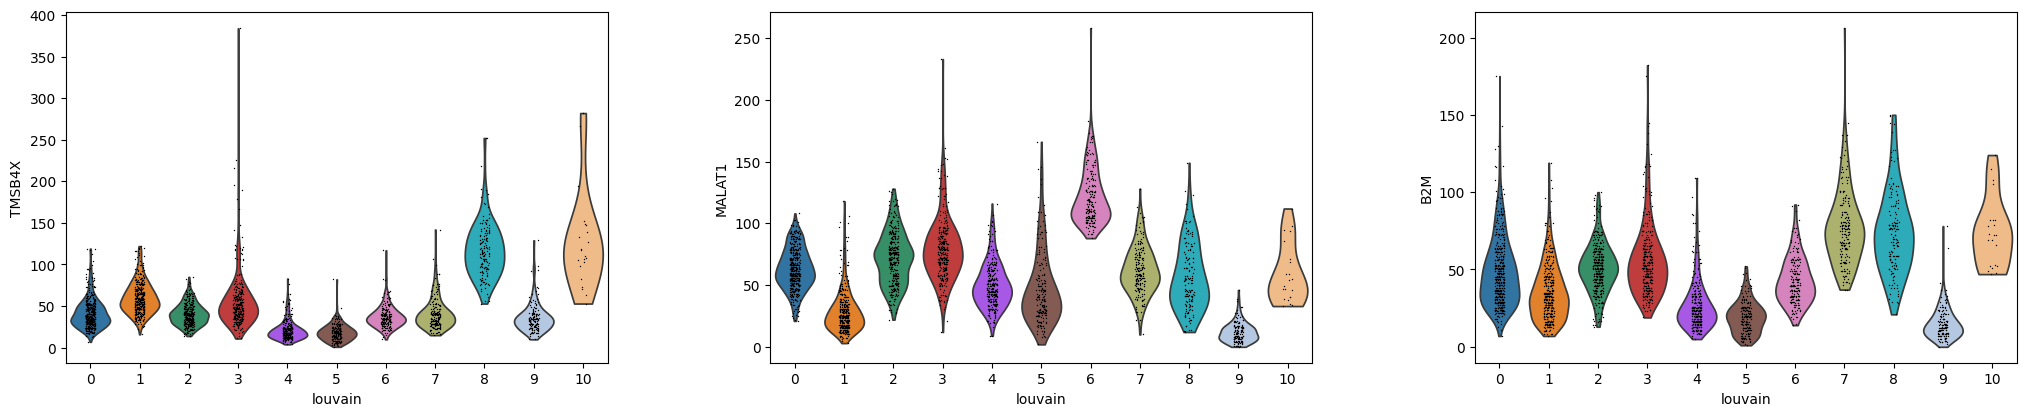

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.violin(adata=data, keys=['TMSB4X', 'MALAT1', 'B2M'], groupby='louvain')

===== QUESTION 5: visualize dendrogram of clusters defined by louvain algorithm on cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


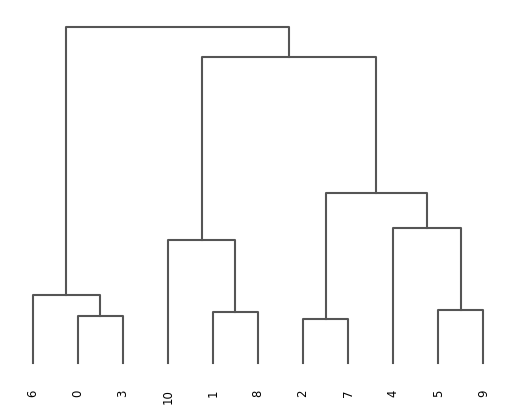

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.louvain(adata=data, resolution=None, random_state=0)
sc.pl.dendrogram(adata=data, groupby='louvain')

===== QUESTION 6: visualize diffusion map embedding of cells which are clustered by leiden algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/pydantic/json_schema.py:2279: PydanticJsonSchemaWarning: Default value (FieldInfo(annotation=NoneType, required=False, default='data', description='Annotated data matrix'),) is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


error 6

===== QUESTION 7: visualize dispersions versus mean expressions of genes in scatter plot. =====
error 7

===== QUESTION 8: visualize PCA embedding of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


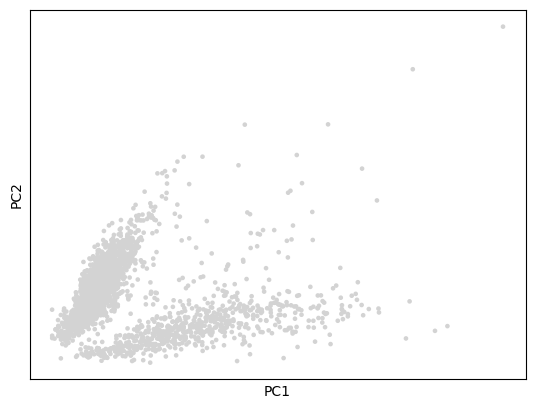

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=2, knn=True)
sc.pl.pca(adata=data, color=None, components='1,2', projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, frameon=None, size=None, show=True, save=None, ax=None, return_fig=False, marker='.', annotate_var_explained=False)

===== QUESTION 9: visualize PCA embedding of cells which are clustered by louvain algorithm. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


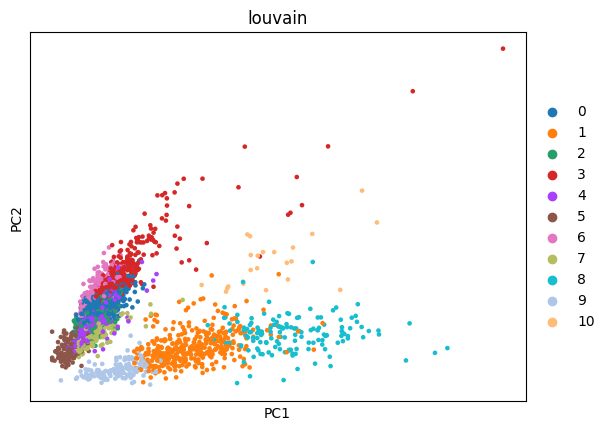

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=50, knn=True)
sc.tl.louvain(adata=data, resolution=1.0, random_state=0)
sc.pl.pca(adata=data, color='louvain', components='1,2', projection='2d', legend_loc='right margin', legend_fontsize=None, legend_fontweight=None, color_map=None, palette=None, frameon=None, size=None, show=None, save=None, ax=None, return_fig=False, marker='.', annotate_var_explained=False)

===== QUESTION 10: visualize umap embedding density of cells. =====


/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/Users/jiahang/Library/Caches/pypoetry/virtualenvs/biochatter-3BXQID4K-py3.11/lib/python3.11/site-packages/scanpy/tools/_utils.py:40: UserWarning: You’re trying to run this on 32738 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


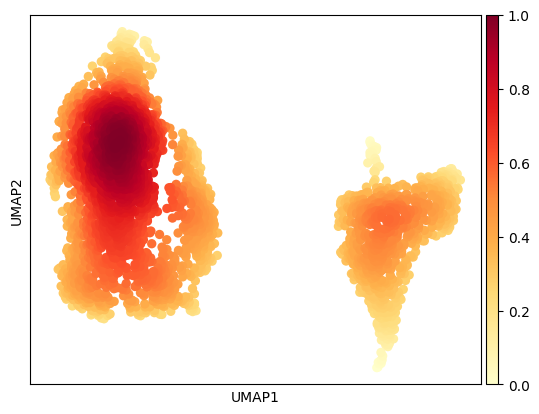

ROOT()
sc.pp.neighbors(adata=data, n_neighbors=15, n_pcs=None, knn=True)
sc.tl.umap(adata=data, min_dist=0.5, spread=1.0, n_components=2)
sc.tl.embedding_density(adata=data, basis='umap', groupby=None, components=None)
sc.pl.embedding_density(adata=data, basis='umap', key=None, groupby=None)



In [4]:
error_cases = {}
for i, question in enumerate(cases):
    print(f"===== QUESTION {i}: {question} =====")
    data = pbmc3k()
    try:
        result = scanpy_agent.execute(question, data=data)
    except Exception as e:
        error_cases[question] = e
        print(f"error {i}")
    
    print()

In [5]:
for key, val in error_cases.items():
    print(key)
    print(val)
    print()

visualize diffusion map embedding of cells which are clustered by leiden algorithm.
Code execution failed at line 'sc.tl.diffmap(adata=data, n_comps=2)' due to: ValueError: Provide any value greater than 2 for `n_comps`. 

visualize dispersions versus mean expressions of genes in scatter plot.
'highly_variable'

